In [1]:
import dotenv
from openai import OpenAI
import openai
import os
import rdflib
import pyshacl
import pandas as pd
from tqdm.notebook import tqdm
import requests
import numpy as np
import matplotlib.pyplot as plt
import json
import functools
from IPython.display import display, Markdown
dotenv.load_dotenv()

True

In [2]:
df = pd.read_csv('rg9sublemma.csv', sep=';')
df

,id_RG,nr_suffix,nr_RG,sublemma,sublemma_no_tags,date_sublemma,note
0,10900001,1,1,<abk720>solv.</abk720> 3 <abk90>fl. adc.</abk9...,solv. 3 fl. adc. pro compositione disp. matri...,12. iul. 1466,1466-07-12
1,10900002,1,2,de <abk82>absol.</abk82> a labe simonie et de...,de absol. a labe simonie et de rehab. et de p...,16. mai. 1466,1466-05-16
2,10900003,1,3,' rationi congruit ' de <abk340>exped.</abk34...,' rationi congruit ' de exped. litt. 1. apr. ...,1. apr. 1468,1468-04-01
3,10900004,1,4,<abk558>rem. plen.</abk558> <date>23. mart. 14...,rem. plen. 23. mart. 1467 L 657 299r.,23. mart. 1467,1467-03-23
4,10900005,1,5,de <abk297>disp.</abk297> ut <abk771>unac.</a...,de disp. ut unac. d. par. eccl. 8 m. arg. qua...,10. ian. 1469,1469-01-10
...,...,...,...,...,...,...,...
13533,10906306,1,6306,Prior <abk326>etc.</abk326> <abk302>dom.</abk...,Prior etc. dom. o. pred. op. Zutphanien. Trai...,20. sept. 1465,1465-09-20
13534,10906306,2,6306,Magistri et fratres fraternitatis <abk417>lai...,Magistri et fratres fraternitatis laic. utr. ...,18. oct. 1465,1465-10-18
13535,10906306,3,6306,Dom. <abk476>o.</abk476> <abk358>fr.</abk358>...,Dom. o. fr. min. e.m. op. Z. Traiect. dioc. d...,16. mai. 1470,1470-05-16
13536,10906307,1,6307,Universi habitatores et incole <abk528>paroch...,Universi habitatores et incole paroch. de Z. ...,23. iun. 1467,1467-06-23


In [3]:
df.id_RG = df.id_RG.astype(str)

In [4]:
# !pip install chromadb==0.5.3

In [2]:
import chromadb
chroma_client = chromadb.PersistentClient(path="rg_vectordb")

In [13]:
collection = chroma_client.get_or_create_collection(name="my_test_collection")

In [14]:
collection.upsert(
    documents=[
        "This is a document about pineapple",
        "This is a document about oranges"
    ],
    ids=["id1", "id2"]
)

In [15]:
results = collection.query(
    query_texts=["This is a query document about florida"], # Chroma will embed this for you
    n_results=2 # how many results to return
)
print(results)


{'ids': [['id2', 'id1']], 'distances': [[1.1462138362398917, 1.3015381579897856]], 'metadatas': [[None, None]], 'embeddings': None, 'documents': [['This is a document about oranges', 'This is a document about pineapple']], 'uris': None, 'data': None, 'included': ['metadatas', 'documents', 'distances']}


In [3]:
chroma_client.list_collections()

In [17]:
collection = chroma_client.get_or_create_collection(name="rg9sublemma")

In [18]:
sublemmas = df.sublemma.to_list()

In [19]:
len(sublemmas)

13538

In [36]:
subset_size = 100
sub_subset = sublemmas[:subset_size]

# Store all rg 9 data

In [38]:
for i in tqdm(range(0, len(sublemmas), subset_size)):
    collection.upsert(
        documents=sublemmas[i: i + subset_size],
        ids=list(map(str, range(i, i + subset_size)))
    )

  0%|          | 0/136 [00:00<?, ?it/s]

ValueError: Number of documents 38 must match number of ids 100

In [44]:
collection.upsert(
    documents=sublemmas[i: len(sublemmas)],
    ids=list(map(str, range(i, len(sublemmas))))
)

In [49]:
collection.get_model()

{'id': UUID('8da9cbef-2fb2-4821-a6aa-fa3850bc7036'),
 'name': 'rg9sublemma',
 'metadata': None,
 'dimension': None,
 'tenant': 'default_tenant',
 'database': 'default_database',
 'version': 0}

In [54]:
results = collection.query(
    query_texts=["Who was Guillelmi Stunt?"], 
    n_results=2
)
print(results['documents'])

[[' de prioratu <abk671>s.</abk671> Guilhelmi <abk108>al.</abk108> <abk256>d.</abk256> della Zerena <abk517>ord.</abk517> <abk256>d.</abk256> sancti extra locum de <abk671>s.</abk671> Cassiano Clusin. <abk296>dioc.</abk296> cui <abk527>par. eccl.</abk527> <abk671>s.</abk671> Leonardi in Lordeto /. unita est 40 <abk90>fl. adc.</abk90> <abk788>vacat.</abk788> <abk521>p.</abk521> <abk658>resign.</abk658> Johannis <abk620>quond.</abk620> Ricardini <abk166>c.</abk166> <abk653>reserv.</abk653> <abk542>pens.</abk542> <abk112>ann.</abk112> 7 duc. auri <date>30. oct. 1467</date> <fund>S 616 76vs</fund>.', ' de <abk527>par. eccl.</abk527> in Mospach prope Pontem Bohemicalem <abk49>Ratisbon.</abk49> <abk296>dioc.</abk296> 4 <abk438>m. arg.</abk438> <abk787>vac.</abk787> <abk521>p.</abk521> <abk658>resign.</abk658> Andree Pfenndler , <abk468>n.o.</abk468> quod Jacobus Pfenndler qui <abk267>def.</abk267> <abk469>nat.</abk469> ex <abk256>d.</abk256> Andrea resignante et soluta patitur <abk256>d.</ab

In [57]:
results['documents'][0]

' de <abk527>par. eccl.</abk527> in Mospach prope Pontem Bohemicalem <abk49>Ratisbon.</abk49> <abk296>dioc.</abk296> 4 <abk438>m. arg.</abk438> <abk787>vac.</abk787> <abk521>p.</abk521> <abk658>resign.</abk658> Andree Pfenndler , <abk468>n.o.</abk468> quod Jacobus Pfenndler qui <abk267>def.</abk267> <abk469>nat.</abk469> ex <abk256>d.</abk256> Andrea resignante et soluta patitur <abk256>d.</abk256> <abk527>par. eccl.</abk527> absque <abk297>disp.</abk297> <abk521>p.</abk521> 18 <abk111>an.</abk111> detinuit <date>21. ian. 1469</date> <fund>S 636 201r</fund>.'

In [4]:
api_key = os.environ.get("API_KEY")
base_url = os.environ.get("ENDPOINT")
client = OpenAI(
    api_key = api_key,
    base_url = base_url
)
response = requests.get(f'{base_url}/models', headers = {
    'Authorization': f'Bearer {api_key}',
    'Content-Type': 'application/json'
})
models = [model["id"] for model in response.json()]
model = models[0]
embedding_model = 'e5-mistral-7b-instruct'


In [5]:
def flatten_json(json):
    if type(json) == list:
        return json
    elif type(json) == dict:
        return list(json.keys())
    else:
        return [json]

In [19]:
def entity_extractor(query: str, entity: str, verbose=False):
    entity = entity.lower()
    messages = [{
        "role": "system",
        "content": f"""
You are an {entity.capitalize()} Entity extraction service. You provide relevant information only in the following json format:
{{["<{entity}1>", "<{entity}2>", ...]}}
Only return the json.
"""},
    {
        "role": "user",
        "content": f"""
Extract the {entity}s (if any) in the text below:
`````
{query}
`````"""
    }]
    if verbose:
        print('Extracting entity with messages:')
        print(messages)
    chat_completion = client.chat.completions.create(messages=messages, 
        model=model,
        temperature=0,
        response_format={ "type": "json_object" }
    )
    return flatten_json(json.loads(chat_completion.choices[0].message.content.strip()))

In [20]:
generic_entity_extractor = functools.partial(entity_extractor, entity='entity')

In [7]:
def person_extractor(query: str):
    chat_completion = client.chat.completions.create(messages=[{
        "role": "system",
        "content": """
You are a Person Entity extraction service.  You provide relevant information only in the following json format:
["<person1>", "<person2>", ...]
Only return the json.
"""},
    {
        "role": "user",
        "content": f"""
Extract the persons (if any) in the text below:
`````
{query}
`````
"""
    }], 
        model=model,
        temperature=0,
        response_format={ "type": "json_object" }
    )
    return chat_completion.choices[0].message.content.strip()

In [247]:
person_extractor('Who was Guillelmi Stunt?')

'["Guillelmi Stunt" ]'

In [178]:
entity_extractor('Welche Ämter gab es im Domstift Naumburg?')

'{"entities": ["Domstift", "Naumburg"]}'

In [243]:
person_extractor('Welche Ämter gab es im Domstift Naumburg?')

'{ \t"persons" \t: \t[ \t] \t}'

In [175]:
entity_extractor('Was ist eine häufige Tätigkeit von Naumburger Domherren?')

'{"entities": ["Naumburger Domherren"]}'

# Store all wiag data

In [181]:
with open('WIAG-Domherren-DB.json', 'r') as file:
    wiag_data = json.loads(file.read())

In [192]:
wiag_ids = pd.DataFrame(wiag_data['persons'])['wiagId'].to_list()
wiag_ids[:10]

['WIAG-Pers-CANON-89046-001',
 'WIAG-Pers-CANON-89045-001',
 'WIAG-Pers-CANON-89054-001',
 'WIAG-Pers-CANON-89050-001',
 'WIAG-Pers-CANON-89093-001',
 'WIAG-Pers-CANON-89136-001',
 'WIAG-Pers-CANON-89154-001',
 'WIAG-Pers-CANON-89176-001',
 'WIAG-Pers-CANON-89175-001',
 'WIAG-Pers-CANON-89201-001']

In [8]:
wiag_collection = chroma_client.get_or_create_collection(name="wiag")

In [200]:
# run once only
subset_size = 100
dataset = wiag_data['persons']
for i in tqdm(range(0, len(dataset), subset_size)):
    wiag_collection.upsert(
        documents=list(map(str, dataset[i: i + subset_size])),
        ids=wiag_ids[i: i + subset_size]
    )

  0%|          | 0/16 [00:00<?, ?it/s]

In [186]:
wiag_data['persons'][:20]

[{'wiagId': 'WIAG-Pers-CANON-89046-001',
  'givenname': 'Alberich',
  'identifier': {'Personendatenbank der Germania Sacra': 'http://personendatenbank.germania-sacra.de/index/gsn/083-00015-001',
   'Factgrid': 'https://database.factgrid.de/entity/Q947667'},
  'offices': [{'title': 'Domherr',
    'diocese': 'Bistum Naumburg',
    'dateBegin': '1088/1090',
    'institution': 'Domstift Naumburg',
    'references': [{'citation': 'Matthias Ludwig, Die Bistümer der Kirchenprovinz Magdeburg. Das Bistum Naumburg 2: Das Domstift Naumburg (Germania Sacra. Dritte Folge 19), Berlin/Boston 2022, S. 970',
      'authorOrEditor': 'Matthias Ludwig',
      'shortTitle': '3. F. 19, Domstift Naumburg'}]}]},
 {'wiagId': 'WIAG-Pers-CANON-89045-001',
  'givenname': 'Adeloldus',
  'identifier': {'Personendatenbank der Germania Sacra': 'http://personendatenbank.germania-sacra.de/index/gsn/083-00006-001',
   'Factgrid': 'https://database.factgrid.de/entity/Q947666'},
  'offices': [{'title': 'Domherr',
    'dio

In [222]:
results = wiag_collection.query(
    query_texts=["Who was Heinrich?"], 
)
results["documents"][0]

["{'wiagId': 'WIAG-Pers-CANON-53191-001', 'givenname': 'Heinrich', 'prefix': 'von', 'familyname': 'Bünau', 'dateOfDeath': '1538', 'familyNameVariant': 'Bunau, Buenaw, Bunaw, Bünau-Radeburg', 'givenNameVariant': 'Enricho', 'biographicalNotes': {'Vater': 'Heinrich der Jüngere von Bünau auf Schkölen und Rudelsburg', 'Bruder': 'Günther von Bünau (Propst in Schkölen)', 'Studium': '1500–02 Leipzig; 1506–07 Wittenberg; 1510 Bologna'}, 'identifier': {'Wikidata': 'https://www.wikidata.org/wiki/Q122071155', 'Personendatenbank der Germania Sacra': 'http://personendatenbank.germania-sacra.de/index/gsn/083-00509-001', 'Repertorium Academicum Germanicum (RAG), ID': 'https://resource.database.rag-online.org/ngMC2P577M63xbiEgMFbw', 'Factgrid': 'https://database.factgrid.de/entity/Q948319'}, 'offices': [{'title': 'Domherr', 'dateBegin': '1510', 'dateEnd': '1538', 'institution': 'Domstift Naumburg', 'references': [{'citation': 'Matthias Ludwig, Die Bistümer der Kirchenprovinz Magdeburg. Das Bistum Naumb

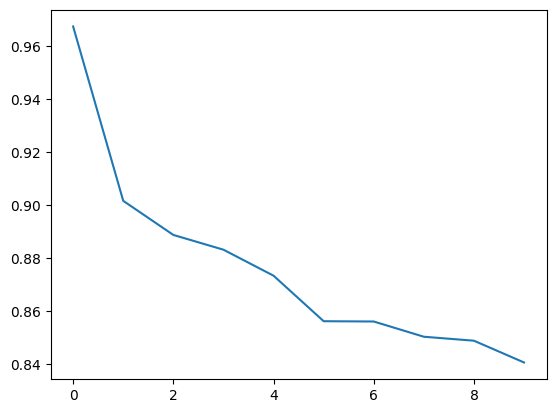

In [218]:
distances_np = np.array(results['distances'][0])
plt.plot(1/distances_np)

In [225]:
np.gradient(distances_np, edge_order=2)

array([0.10511601, 0.04574168, 0.01157546, 0.00990641, 0.0178414 ,
       0.01155889, 0.00402349, 0.00498748, 0.00679386, 0.01622283])

In [226]:
np.ediff1d(distances_np)

array([0.07542884, 0.01605451, 0.00709641, 0.01271641, 0.02296638,
       0.0001514 , 0.00789559, 0.00207937, 0.01150835])

In [191]:
len(wiag_ids)

1509

In [197]:
type(dataset[i: i + subset_size][0])

dict

In [198]:
type(wiag_ids[i: i + subset_size][0])

str

In [233]:
wiag_collection.query(
    query_texts=["Who was Heinrich?"],
    include=["metadatas", "documents", "distances", "embeddings"],
)["embeddings"][0][0]

0.9999999998810137

In [239]:
query = "Who was Heinrich?"
persons = json.loads(person_extractor(query))
persons

{'persons': ['Heinrich']}

In [288]:
query = "Who was Heinrich?"
persons = json.loads(person_extractor(query))
if len(persons) > 1:
    where_document={
        "$or": [
            {
                "$contains": person
            } for person in persons["persons"]
        ]
    }
else:
    where_document={
        "$contains": persons[0]
    }
all_documents = wiag_collection.get(
    where_document=where_document,
)
len(all_documents['documents'])

177

In [45]:
def summariser(query, documents, system_prompt=''):
    if not system_prompt:
        system_prompt = """You are a Historical text summariser. You summarise json text meaningfully. Don't repeat the fact that you get JSON text."""
    chat_completion = client.chat.completions.create(
        messages=[{
            "role": "system",
            "content": system_prompt
        },
        {
            "role": "user",
            "content": f"""Summarise text below to answer the query {query}:
    ```
    {documents}
    ```
    """
        }],
            model=model,
        extra_headers = {
            "inference-service": model,
        }
    )
    return chat_completion.choices[0].message.content.strip()

In [27]:
def chunker(list_, chunk_size):
    return [list_[i:i + chunk_size] for i in range(0, len(list_), chunk_size)]

In [265]:
chunk_size = 50
all_docs = all_documents['documents']

summaries = [summariser(query, doc_chunk) for doc_chunk in tqdm(chunker(all_docs, chunk_size))]
summaries

  0%|          | 0/4 [00:00<?, ?it/s]

['Heinrich Stammer was a member of the Domstift Naumburg in 1525, as indicated by the text snippet.',
 'Heinrich was a German clergyman who held various offices in the Diocese of Naumburg, a Catholic diocese in what is now Germany. The text mentions multiple individuals with the name Heinrich, each with their own set of offices and dates of service. Some of the offices mentioned include Domherr, Domvikar, Propst, and Exspektant. The text also provides references to sources that provide more information about each individual. \n\nOne notable Heinrich mentioned is Friedrich Heinrich, who served as Domvikar from 1675 to 1730, and his brother Friedrich Heinrich, who served from 1679 to 1740. Another notable Heinrich is Albert Heinrich, who served as Exspektant from 1658. \n\nThe text does not provide a comprehensive biography of a single individual named Heinrich, but rather a collection of information about multiple individuals with the same name who held various offices in the Diocese of

In [276]:
summariser(query, [*summaries, wiag_collection.query(
    query_texts=["Who was Heinrich?"], 
)['documents'][0]])

'Based on the provided text, there were several individuals named Heinrich throughout history, each with their own set of offices and dates of service. Here are a few notable ones:\n\n* Heinrich Bünau (d. 1538), a German clergyman who held various offices in the Diocese of Naumburg, including Domherr, Domkustos, and Domdekan.\n* Heinrich von Kappel (d. 1463), a German clergyman who held various offices in the Diocese of Erfurt, including Kanoniker, Propst, and Domherr.\n* Heinrich von Heynitz (d. 1615), a German clergyman who held various offices in the Diocese of Naumburg, including Domherr, Domscholaster, and Stiftsherr.\n* Heinrich von Miltz (d. 1424), a German clergyman who held various offices in the Diocese of Würzburg, including Domherr, Domdekan, and Dompropst.\n\nHowever, without more specific information, it is difficult to determine which Heinrich is being referred to in a particular context. If you have a specific question or context in mind, I would be happy to try and pro

In [282]:
church_extractor = functools.partial(entity_extractor, entity='cathedral')
church_extractor("Welche Ämter gab es im Domstift Naumburg?")

['Domstift Naumburg']

In [17]:
query = "Welche Ämter gab es im Domstift Naumburg?"
#generic_entity_extractor(query)

In [39]:
def all_entity_search(query, verbose=False):
    if verbose:
        print('Extracting all entities...')
    entities = generic_entity_extractor(query, verbose=verbose)

    # split words if they are splittable and then add them to original list
    entities_sp = [entity.split() for entity in entities if ' ' in entity]
    entities_sp = [item for sublist in entities_sp for item in sublist]
    entities.extend(entities_sp)
    
    if verbose:
        print(f'Following entities found: {entities}')
    if len(entities) > 1:
        where_document={
            "$or": [
                {
                    "$contains": entity
                } for entity in entities
            ]
        }
    else:
        where_document={
            "$contains": entities[0]
        }
    if verbose:
        print('Searching the database...')
    all_documents = wiag_collection.get(
        where_document=where_document,
    )
    return all_documents['documents']

In [299]:
all_documents = all_entity_search(query)
len(all_documents)

1509

In [301]:
chunk_size = 30
all_docs = all_documents

summaries = [summariser(query, doc_chunk) for doc_chunk in tqdm(chunker(all_docs, chunk_size))]
summaries

  0%|          | 0/51 [00:00<?, ?it/s]

['Based on the provided JSON text, it appears to be a collection of historical data about individuals who held various offices in medieval German monasteries and churches. The data is organized in a hierarchical structure, with each individual represented by a JSON object that contains metadata such as their name, date of birth and death, and academic titles.\n\nTo answer the query "Welche Ämter gab es im Domstift Naumburg?", we can look at the "offices" field of each individual and search for the specific domain "Domstift Naumburg". Here is a possible answer:\n\n* Domherr (1401-1417, 1401-1417, 1409-1417, 1401-1417, 1427-1429, 1434-1437, 1461-1463, 1568-1576, 1576-1577, 1585-1587, 1595-1597)\n* Dompropst (1427-1433, 1434-1437, 1452-1458)\n* Domkämmerer (vor 1458)\n* Domvikar (vor 1458)\n* Domdekan (1456-1463, 1585-1587, 1595-1597)\n* Vikar (vor 1458)\n* Domherr (vor 1458)\n* Propst (vor 1458)\n* Domkantor (vor 1458)\n* Domscholaster (vor 1458)\n* Domthesaurar (vor 1458)\n* Domkustos (

In [326]:
summariser(query, [*summaries, wiag_collection.query(
    query_texts=[query], 
)['documents'][0]])

'Basierend auf den übergebenen Daten kann man folgende Ämter im Domstift Naumburg identifizieren:\n\n* Domherr: Dieses Amt wurde von verschiedenen Personen bekleidet, darunter Johann Friedrich von der Goltz, Christian Adolf von Seckendorff und Friedrich Wilhelm von Vitzthum.\n* Domvikar: Dieses Amt wurde von verschiedenen Personen bekleidet, darunter Johann Friedrich von der Goltz, Johann Georg von Eckstedt und Georg Wettig.\n* Domkantor: Dieses Amt wurde von verschiedenen Personen bekleidet, darunter Johann Friedrich von der Goltz, Johann Georg von Eckstedt und Georg Wettig.\n* Domdekan: Dieses Amt wurde von verschiedenen Personen bekleidet, darunter Johann Friedrich von der Goltz, Johann Georg von Eckstedt und Georg Wettig.\n* Dompropst: Dieses Amt wurde von verschiedenen Personen bekleidet, darunter Johann Friedrich von der Goltz, Johann Georg von Eckstedt und Georg Wettig.\n* Domkustos: Dieses Amt wurde von verschiedenen Personen bekleidet, darunter Johann Friedrich von der Goltz, 

In [321]:
real_set = set([office['title'] for doc in all_docs for office in json.loads(doc.replace("'",'"'))['offices']])
real_set

{'Abt',
 'Administrator',
 'Archidiakon',
 'Bischof',
 'Bischöflicher Offizial',
 'Bischöflicher Rat',
 'Dekan',
 'Domdekan',
 'Domherr',
 'Domherr, Anwärter',
 'Domizellar',
 'Domkameral',
 'Domkanoniker, Anwärter',
 'Domkantor',
 'Domkellner',
 'Domkustos',
 'Domkämmerer',
 'Domprediger',
 'Dompropst',
 'Domscholaster',
 'Domthesaurar',
 'Domthesaurar, Anwärter',
 'Domvikar',
 'Elekt',
 'Erzbischof',
 'Exspektant',
 'Generalvikar',
 'Generalvikar des Bischofs',
 'Kanonikatsanwärter',
 'Kanonikatsbewerber',
 'Kanoniker',
 'Kanoniker, Anwärter',
 'Kanonikerin',
 'Kantor',
 'Kaplan',
 'Kardinal',
 'Kellner',
 'Koadjutor des Bischofs',
 'Koadjutor des Erzbischofs',
 'Kustos',
 'Offizial',
 'Pfarrer',
 'Propst',
 'Propsteianwärter',
 'Propsteibewerber',
 'Providierter Domherr',
 'Providierter Domscholaster',
 'Scholaster',
 'Senior',
 'Stiftsherr',
 'Thesaurar',
 'Vikar',
 'Vikar, Anwärter',
 'Vikariatsbewerber',
 'Vikarieanwärter',
 'Viztum',
 'Weihbischof'}

In [327]:
display(Markdown('Basierend auf den übergebenen Daten kann man folgende Ämter im Domstift Naumburg identifizieren:\n\n* Domherr: Dieses Amt wurde von verschiedenen Personen bekleidet, darunter Johann Friedrich von der Goltz, Christian Adolf von Seckendorff und Friedrich Wilhelm von Vitzthum.\n* Domvikar: Dieses Amt wurde von verschiedenen Personen bekleidet, darunter Johann Friedrich von der Goltz, Johann Georg von Eckstedt und Georg Wettig.\n* Domkantor: Dieses Amt wurde von verschiedenen Personen bekleidet, darunter Johann Friedrich von der Goltz, Johann Georg von Eckstedt und Georg Wettig.\n* Domdekan: Dieses Amt wurde von verschiedenen Personen bekleidet, darunter Johann Friedrich von der Goltz, Johann Georg von Eckstedt und Georg Wettig.\n* Dompropst: Dieses Amt wurde von verschiedenen Personen bekleidet, darunter Johann Friedrich von der Goltz, Johann Georg von Eckstedt und Georg Wettig.\n* Domkustos: Dieses Amt wurde von verschiedenen Personen bekleidet, darunter Johann Friedrich von der Goltz, Johann Georg von Eckstedt und Georg Wettig.\n* Domscholaster: Dieses Amt wurde von verschiedenen Personen bekleidet, darunter Johann Friedrich von der Goltz, Johann Georg von Eckstedt und Georg Wettig.\n* Propst: Dieses Amt wurde von verschiedenen Personen bekleidet, darunter Johann Friedrich von der Goltz, Johann Georg von Eckstedt und Georg Wettig.\n* Kanoniker: Dieses Amt wurde von verschiedenen Personen bekleidet, darunter Johann Friedrich von der Goltz, Johann Georg von Eckstedt und Georg Wettig.\n* Vikar: Dieses Amt wurde von verschiedenen Personen bekleidet, darunter Johann Friedrich von der Goltz, Johann Georg von Eckstedt und Georg Wettig.\n* Exspektant: Dieses Amt wurde von verschiedenen Personen bekleidet, darunter Johann Friedrich von der Goltz, Johann Georg von Eckstedt und Georg Wettig.\n\nEs ist jedoch zu beachten, dass diese Liste nicht vollständig ist und es möglicherweise noch weitere Ämter und Personen im Domstift Naumburg gab.'))

Basierend auf den übergebenen Daten kann man folgende Ämter im Domstift Naumburg identifizieren:

* Domherr: Dieses Amt wurde von verschiedenen Personen bekleidet, darunter Johann Friedrich von der Goltz, Christian Adolf von Seckendorff und Friedrich Wilhelm von Vitzthum.
* Domvikar: Dieses Amt wurde von verschiedenen Personen bekleidet, darunter Johann Friedrich von der Goltz, Johann Georg von Eckstedt und Georg Wettig.
* Domkantor: Dieses Amt wurde von verschiedenen Personen bekleidet, darunter Johann Friedrich von der Goltz, Johann Georg von Eckstedt und Georg Wettig.
* Domdekan: Dieses Amt wurde von verschiedenen Personen bekleidet, darunter Johann Friedrich von der Goltz, Johann Georg von Eckstedt und Georg Wettig.
* Dompropst: Dieses Amt wurde von verschiedenen Personen bekleidet, darunter Johann Friedrich von der Goltz, Johann Georg von Eckstedt und Georg Wettig.
* Domkustos: Dieses Amt wurde von verschiedenen Personen bekleidet, darunter Johann Friedrich von der Goltz, Johann Georg von Eckstedt und Georg Wettig.
* Domscholaster: Dieses Amt wurde von verschiedenen Personen bekleidet, darunter Johann Friedrich von der Goltz, Johann Georg von Eckstedt und Georg Wettig.
* Propst: Dieses Amt wurde von verschiedenen Personen bekleidet, darunter Johann Friedrich von der Goltz, Johann Georg von Eckstedt und Georg Wettig.
* Kanoniker: Dieses Amt wurde von verschiedenen Personen bekleidet, darunter Johann Friedrich von der Goltz, Johann Georg von Eckstedt und Georg Wettig.
* Vikar: Dieses Amt wurde von verschiedenen Personen bekleidet, darunter Johann Friedrich von der Goltz, Johann Georg von Eckstedt und Georg Wettig.
* Exspektant: Dieses Amt wurde von verschiedenen Personen bekleidet, darunter Johann Friedrich von der Goltz, Johann Georg von Eckstedt und Georg Wettig.

Es ist jedoch zu beachten, dass diese Liste nicht vollständig ist und es möglicherweise noch weitere Ämter und Personen im Domstift Naumburg gab.

In [340]:
predicted_set = set([
   "Domherr","Domvikar","Domdekan","Dompropst","Propst","Domscholaster","Domkantor","Domkustos","Domvikar (mit verschiedenen Beginn- und Enddaten für verschiedene Personen)","Stiftsherr","Kanoniker","Exspektant","Domprediger","Vikar","Offizial","Domscholaster","Domkustos","Domdekan","Dompropst","Propst","Kanoniker","Vikar","Offizial"
])
predicted_set

{'Domdekan',
 'Domherr',
 'Domkantor',
 'Domkustos',
 'Domprediger',
 'Dompropst',
 'Domscholaster',
 'Domvikar',
 'Domvikar (mit verschiedenen Beginn- und Enddaten für verschiedene Personen)',
 'Exspektant',
 'Kanoniker',
 'Offizial',
 'Propst',
 'Stiftsherr',
 'Vikar'}

In [325]:
real_set - predicted_set

{'Abt',
 'Administrator',
 'Archidiakon',
 'Bischof',
 'Bischöflicher Offizial',
 'Bischöflicher Rat',
 'Dekan',
 'Domherr, Anwärter',
 'Domizellar',
 'Domkameral',
 'Domkanoniker, Anwärter',
 'Domkellner',
 'Domkämmerer',
 'Domthesaurar',
 'Domthesaurar, Anwärter',
 'Elekt',
 'Erzbischof',
 'Generalvikar',
 'Generalvikar des Bischofs',
 'Kanonikatsanwärter',
 'Kanonikatsbewerber',
 'Kanoniker, Anwärter',
 'Kanonikerin',
 'Kantor',
 'Kaplan',
 'Kardinal',
 'Kellner',
 'Koadjutor des Bischofs',
 'Koadjutor des Erzbischofs',
 'Kustos',
 'Pfarrer',
 'Propsteianwärter',
 'Propsteibewerber',
 'Providierter Domherr',
 'Providierter Domscholaster',
 'Scholaster',
 'Senior',
 'Thesaurar',
 'Vikar, Anwärter',
 'Vikariatsbewerber',
 'Vikarieanwärter',
 'Viztum',
 'Weihbischof'}

In [48]:
meta_summariser = functools.partial(summariser, system_prompt="You are a Meta Historical text summariser. You summarise text meaningfully. If you get list data, preserve all elements.")

In [52]:
def entity_workflow(query: str, verbose=False, similar_info=False):
    if verbose:
        print('Searching all docs...')
    all_documents = all_entity_search(query, verbose=verbose)

    chunk_size = 30
    all_docs = all_documents
    
    if verbose:
        print('Summarising chunks of docs...')
    summaries = [summariser(query, doc_chunk) for doc_chunk in tqdm(chunker(all_docs, chunk_size))]
    if verbose:
        print('Creating final summary...')
    similar_docs = []
    if similar_info:
        similar_docs = wiag_collection.query(
            query_texts=[query], 
        )['documents'][0]
    
    return {
        'final_summary' : meta_summariser(query, [*summaries, summariser(query, similar_docs)]),
        'summaries': summaries
    }

In [28]:
query = "In welcher Beziehung standen die Naumburgern Domherren zum Bischof?"
entity_workflow(query, verbose=True)

Searching all docs...
Extracting all entities...
Extracting entity with messages:
[{'role': 'system', 'content': '\nYou are an Entity Entity extraction service. You provide relevant information only in the following json format:\n{["<entity1>", "<entity2>", ...]}\nOnly return the json.\n'}, {'role': 'user', 'content': '\nExtract the entitys (if any) in the text below:\n`````\nIn welcher Beziehung standen die Naumburgern Domherren zum Bischof?\n`````'}]
Following entities found: ['Naumburgern Domherren', 'Bischof']
Searching the database...
Summarising chunks of docs...


  0%|          | 0/2 [00:00<?, ?it/s]

Creating final summary...


{'final_summary': 'Die Naumburger Domherren standen in einer Dienstbeziehung zum Bischof von Naumburg. Sie waren Teil des Domkapitels und unterstanden ihm. Die Domherren hatten verschiedene Ämter inne, wie zum Beispiel Domherr, Domdekan, Dompropst oder Vikar, und einige von ihnen waren sogar Bischof oder Kardinal. Sie dienten dem Bischof als Vertraute und Berater und waren für die Verwaltung des Bistums und die Durchführung von Aufgaben des Bischofs zuständig.',
 'summaries': ['In welcher Beziehung standen die Naumburger Domherren zum Bischof?\n\nDie Naumburger Domherren standen in einer Dienstbeziehung zum Bischof. Die meisten Domherren hatten verschiedene Ämter inne, wie Domherr, Domdekan, Dompropst, Domscholaster, Propst, Vikar, Dekan, Kanoniker, Domvikar, Generalvikar, Thesaurar und Domkämmerer. Einige von ihnen waren auch Propsteianwärter oder hatten Ämter in anderen Stiften. Einige Domherren waren auch Bischof oder Kardinal. Die Naumburger Domherren waren also Teil des Domkapitel

In [53]:
query = "Zeige mir eine Auflistung aller Naumburger Domherren."
entity_workflow(query, verbose=True, similar_info=True)

Searching all docs...
Extracting all entities...
Extracting entity with messages:
[{'role': 'system', 'content': '\nYou are an Entity Entity extraction service. You provide relevant information only in the following json format:\n{["<entity1>", "<entity2>", ...]}\nOnly return the json.\n'}, {'role': 'user', 'content': '\nExtract the entitys (if any) in the text below:\n`````\nZeige mir eine Auflistung aller Naumburger Domherren.\n`````'}]
Following entities found: ['Naumburger Domherren', 'Naumburger', 'Domherren']
Searching the database...
Summarising chunks of docs...


  0%|          | 0/3 [00:00<?, ?it/s]

Creating final summary...


{'final_summary': 'Eine Auflistung aller Naumburger Domherren. \n\n1. Georg von Karlowitz (1357-1364)\n2. Sighard von Schwarzburg (1357-1364)\n3. Johannes Mentz (1412-1425)\n4. Conrad Thus (1403-1435)\n5. Dietrich Domenitz (1422-1452)\n6. Berthold von Wildungen (1405-1426)\n7. Busso von Beichlingen (1414-1452)\n8. Otto von Miltz (1380-1424)\n9. Bernhard von Draschwitz (1532-1565)\n10. Heinrich Poster (1536-1596)\n11. Peter von Naumarck (1547-1576)\n12. Johann Friedrich von Burkersroda (1595-1640)\n13. Günter von Bünau (1470-1519)\n14. Heinrich von Gleißenthal (1578-1623)\n15. Johannes von Neuenmarkt (1359-1389)\n16. Jodo von Deto (1385)\n17. Burkhard von Bruchterte (1346-1362)\n18. Günther von Bünau (vor 1394)\n19. Johannes von Eckartsberga (1371-1406)\n20. Lambert von Goch (1399-1405)\n21. Georg von Bünau (vor 1425)\n22. Henning von Grope (1391-1426)\n23. Thomas von Lohma (1421-1429)\n24. Hartung von Andreae (1463-1493)\n25. Andreas von Könneritz (1468-1496)\n26. Hermann Nullenberg (v

In [54]:
display(Markdown('Eine Auflistung aller Naumburger Domherren. \n\n1. Georg von Karlowitz (1357-1364)\n2. Sighard von Schwarzburg (1357-1364)\n3. Johannes Mentz (1412-1425)\n4. Conrad Thus (1403-1435)\n5. Dietrich Domenitz (1422-1452)\n6. Berthold von Wildungen (1405-1426)\n7. Busso von Beichlingen (1414-1452)\n8. Otto von Miltz (1380-1424)\n9. Bernhard von Draschwitz (1532-1565)\n10. Heinrich Poster (1536-1596)\n11. Peter von Naumarck (1547-1576)\n12. Johann Friedrich von Burkersroda (1595-1640)\n13. Günter von Bünau (1470-1519)\n14. Heinrich von Gleißenthal (1578-1623)\n15. Johannes von Neuenmarkt (1359-1389)\n16. Jodo von Deto (1385)\n17. Burkhard von Bruchterte (1346-1362)\n18. Günther von Bünau (vor 1394)\n19. Johannes von Eckartsberga (1371-1406)\n20. Lambert von Goch (1399-1405)\n21. Georg von Bünau (vor 1425)\n22. Henning von Grope (1391-1426)\n23. Thomas von Lohma (1421-1429)\n24. Hartung von Andreae (1463-1493)\n25. Andreas von Könneritz (1468-1496)\n26. Hermann Nullenberg (vor 1499)\n27. Roglinc (nach 1400 - vor 1500)\n28. Rudolf Bünau (1504-1505)\n29. Christoph Schönberg (1481-1510)\n30. Melchior Renner (vor 1513)\n31. Johannes Kitzscher (1496-1521)\n32. Georg Jornver (vor 1522)\n33. Georg Schönberg der Ältere (1487-1525)\n34. Peter Weihersdorf (vor 1531)\n35. Ernst von Regenstein (1540-1563)\n36. Georg Forstmeister (1481-1542)\n37. Christoph Stontzsch (1519-1554)\n38. Kaspar Würzburg (1518-1551)\n39. Bernhard von Münch (1549-1563)\n40. Kaspar Ulrich von Regenstein (1563-1575)\n41. Günther von Bünau (1549-1591)\n42. Jakob von Etzdorf (1565-1606)\n43. Heinrich von Heynitz (1560-1615)\n44. Michael Gödecke (1565-1569)\n45. Georg von Molau (1556-1580)\n46. Konrad von Breitenbach (1549-1558)\n47. Johannes Bernhard von Gabelentz (1556-1568/1569)\n48. Johannes Heinrich von Metzsch (1561-1618)\n49. Johannes von Krakau (1575-1606)\n50. Christoph von Etzdorf (1593-1597)\n51. Wolfgang Otto von Brandenstein (1615-1623)\n52. Cäsar von Pflug (1616-1628)\n53. Siegmund Metzsch (vor 1629-1643)\n54. Johann Georg von Weltzen (1623-1645)\n55. Gottfried von Kayn (1610-1650)\n56. Heidenreich von Zangenberg (1243-1269)\n57. Heinrich von Angern (1392-1411)\n58. Georg von Schönberg (1411-1413)\n59. Dietrich von Schönberg (1413-1431)\n60. Jörg von Schönberg (1431-1446)\n61. Johann von Haugwitz (1446-1454)\n62. Johannes von Haugwitz (1454-1474)\n63. Burkhard von Haugwitz (1474-1484)\n64. Johann von Haugwitz (1484-1491)\n65. Johann von Haugwitz (1491-1495)\n66. Johann von Haugwitz (1495-1506)\n67. Johann von Haugwitz (1506-1512)\n68. Johann von Haugwitz (1512-1522)\n69. Johann von Haugwitz (1522-1534)\n70. Johann von Haugwitz (1534-1544)\n71. Johann von Haugwitz (1544-1558)\n72. Johann von Haugwitz (1558-1570)\n73. Johann von Haugwitz (1570-1580)\n74. Johann von Haugwitz (1580-1592)\n75. Johann Otto Balthasar Weise (1750, Exspektant)\n76. Ulrich Kolbe (1483, Domvikar)\n77. Heinrich Basel (1494, Domvikar)\n78. Heinrich Große (1452, Domvikar)\n79. Heinrich Siele (1463, Domvikar)\n80. Heinrich Dhume (1477, Domvikar)\n81. Heinrich (1342, Domvikar)\n82. Ulrich (vor 1518, Domvikar)\n\nBitte beachte, dass diese Liste nicht vollständig ist und möglicherweise weitere Domherren nicht aufgeführt sind.'))

Eine Auflistung aller Naumburger Domherren. 

1. Georg von Karlowitz (1357-1364)
2. Sighard von Schwarzburg (1357-1364)
3. Johannes Mentz (1412-1425)
4. Conrad Thus (1403-1435)
5. Dietrich Domenitz (1422-1452)
6. Berthold von Wildungen (1405-1426)
7. Busso von Beichlingen (1414-1452)
8. Otto von Miltz (1380-1424)
9. Bernhard von Draschwitz (1532-1565)
10. Heinrich Poster (1536-1596)
11. Peter von Naumarck (1547-1576)
12. Johann Friedrich von Burkersroda (1595-1640)
13. Günter von Bünau (1470-1519)
14. Heinrich von Gleißenthal (1578-1623)
15. Johannes von Neuenmarkt (1359-1389)
16. Jodo von Deto (1385)
17. Burkhard von Bruchterte (1346-1362)
18. Günther von Bünau (vor 1394)
19. Johannes von Eckartsberga (1371-1406)
20. Lambert von Goch (1399-1405)
21. Georg von Bünau (vor 1425)
22. Henning von Grope (1391-1426)
23. Thomas von Lohma (1421-1429)
24. Hartung von Andreae (1463-1493)
25. Andreas von Könneritz (1468-1496)
26. Hermann Nullenberg (vor 1499)
27. Roglinc (nach 1400 - vor 1500)
28. Rudolf Bünau (1504-1505)
29. Christoph Schönberg (1481-1510)
30. Melchior Renner (vor 1513)
31. Johannes Kitzscher (1496-1521)
32. Georg Jornver (vor 1522)
33. Georg Schönberg der Ältere (1487-1525)
34. Peter Weihersdorf (vor 1531)
35. Ernst von Regenstein (1540-1563)
36. Georg Forstmeister (1481-1542)
37. Christoph Stontzsch (1519-1554)
38. Kaspar Würzburg (1518-1551)
39. Bernhard von Münch (1549-1563)
40. Kaspar Ulrich von Regenstein (1563-1575)
41. Günther von Bünau (1549-1591)
42. Jakob von Etzdorf (1565-1606)
43. Heinrich von Heynitz (1560-1615)
44. Michael Gödecke (1565-1569)
45. Georg von Molau (1556-1580)
46. Konrad von Breitenbach (1549-1558)
47. Johannes Bernhard von Gabelentz (1556-1568/1569)
48. Johannes Heinrich von Metzsch (1561-1618)
49. Johannes von Krakau (1575-1606)
50. Christoph von Etzdorf (1593-1597)
51. Wolfgang Otto von Brandenstein (1615-1623)
52. Cäsar von Pflug (1616-1628)
53. Siegmund Metzsch (vor 1629-1643)
54. Johann Georg von Weltzen (1623-1645)
55. Gottfried von Kayn (1610-1650)
56. Heidenreich von Zangenberg (1243-1269)
57. Heinrich von Angern (1392-1411)
58. Georg von Schönberg (1411-1413)
59. Dietrich von Schönberg (1413-1431)
60. Jörg von Schönberg (1431-1446)
61. Johann von Haugwitz (1446-1454)
62. Johannes von Haugwitz (1454-1474)
63. Burkhard von Haugwitz (1474-1484)
64. Johann von Haugwitz (1484-1491)
65. Johann von Haugwitz (1491-1495)
66. Johann von Haugwitz (1495-1506)
67. Johann von Haugwitz (1506-1512)
68. Johann von Haugwitz (1512-1522)
69. Johann von Haugwitz (1522-1534)
70. Johann von Haugwitz (1534-1544)
71. Johann von Haugwitz (1544-1558)
72. Johann von Haugwitz (1558-1570)
73. Johann von Haugwitz (1570-1580)
74. Johann von Haugwitz (1580-1592)
75. Johann Otto Balthasar Weise (1750, Exspektant)
76. Ulrich Kolbe (1483, Domvikar)
77. Heinrich Basel (1494, Domvikar)
78. Heinrich Große (1452, Domvikar)
79. Heinrich Siele (1463, Domvikar)
80. Heinrich Dhume (1477, Domvikar)
81. Heinrich (1342, Domvikar)
82. Ulrich (vor 1518, Domvikar)

Bitte beachte, dass diese Liste nicht vollständig ist und möglicherweise weitere Domherren nicht aufgeführt sind.

In [60]:
from nltk.stem.cistem import Cistem
stemmer = Cistem()

In [61]:
stemmer.stem('Naumburger')

'naumburg'

In [70]:

all_documents = wiag_collection.get(
    where_document={
        "$contains": 'naumburg'
    },
)
all_documents

{'ids': [],
 'embeddings': None,
 'metadatas': [],
 'documents': [],
 'uris': None,
 'data': None,
 'included': ['metadatas', 'documents']}

In [71]:
all_documents = wiag_collection.get(
    where_document={
        "$contains": 'Naumburg'
    },
)
len(all_documents['documents'])

1509

In [72]:
all_documents

{'ids': ['WIAG-Pers-CANON-12619-001',
  'WIAG-Pers-CANON-12625-001',
  'WIAG-Pers-CANON-13272-001',
  'WIAG-Pers-CANON-18777-001',
  'WIAG-Pers-CANON-19557-001',
  'WIAG-Pers-CANON-19592-001',
  'WIAG-Pers-CANON-19641-001',
  'WIAG-Pers-CANON-19758-001',
  'WIAG-Pers-CANON-19830-001',
  'WIAG-Pers-CANON-25837-001',
  'WIAG-Pers-CANON-26108-001',
  'WIAG-Pers-CANON-45011-001',
  'WIAG-Pers-CANON-45302-001',
  'WIAG-Pers-CANON-45449-001',
  'WIAG-Pers-CANON-45488-001',
  'WIAG-Pers-CANON-45754-001',
  'WIAG-Pers-CANON-45828-001',
  'WIAG-Pers-CANON-45829-001',
  'WIAG-Pers-CANON-45831-001',
  'WIAG-Pers-CANON-45832-001',
  'WIAG-Pers-CANON-48812-001',
  'WIAG-Pers-CANON-48885-001',
  'WIAG-Pers-CANON-49448-001',
  'WIAG-Pers-CANON-49726-001',
  'WIAG-Pers-CANON-52249-001',
  'WIAG-Pers-CANON-52286-001',
  'WIAG-Pers-CANON-52291-001',
  'WIAG-Pers-CANON-52330-001',
  'WIAG-Pers-CANON-52342-001',
  'WIAG-Pers-CANON-52357-001',
  'WIAG-Pers-CANON-52360-001',
  'WIAG-Pers-CANON-52364-001',
 

# Clean start with lowercase elements

In [1]:
import dotenv
from openai import OpenAI
import openai
import os
import rdflib
import pyshacl
import pandas as pd
from tqdm.notebook import tqdm
import requests
import numpy as np
import matplotlib.pyplot as plt
import json
import functools
from IPython.display import display, Markdown
dotenv.load_dotenv()

True

In [2]:
import chromadb
chroma_client = chromadb.PersistentClient(path="rg_vectordb")

In [3]:
chroma_client.list_collections()

In [4]:
from nltk.stem.cistem import Cistem
stemmer = Cistem()

In [61]:
api_key = os.environ.get("API_KEY")
base_url = os.environ.get("ENDPOINT")
client = OpenAI(
    api_key = api_key,
    base_url = base_url
)
response = requests.get(f'{base_url}/models', headers = {
    'Authorization': f'Bearer {api_key}',
    'Content-Type': 'application/json'
})
models = [model["id"] for model in response.json()]
model = models[0]
embedding_model = 'e5-mistral-7b-instruct'


In [62]:
models

['meta-llama-3.1-8b-instruct',
 'mixtral-8x7b-instruct',
 'qwen2-72b-instruct',
 'meta-llama-3.1-70b-instruct',
 'orgunit_UXAW',
 'org_UNI']

In [60]:
api_key

'1ee883733e6eb229f284c05c72708158'

In [ ]:
MAX_NUM_CHARS = 374_776
SUMM_OPT_CHARS = ??

In [6]:
def flatten_json(json):
    if type(json) == list:
        return json
    elif type(json) == dict:
        return list(json.keys())
    else:
        return [json]

In [7]:
@functools.cache
def entity_extractor(query: str, entity: str, verbose=False):
    entity = entity.lower()
    messages = [{
        "role": "system",
        "content": f"""
You are an {entity.capitalize()} Entity extraction service. You provide relevant information only in the following json format:
{{["<{entity}1>", "<{entity}2>", ...]}}
Only return the json.
"""},
    {
        "role": "user",
        "content": f"""
Extract the {entity}s (if any) in the text below:
`````
{query}
`````"""
    }]
    if verbose:
        print('Extracting entity with messages:')
        print(messages)
    chat_completion = client.chat.completions.create(messages=messages, 
        model=model,
        temperature=0,
        response_format={ "type": "json_object" }
    )
    return flatten_json(json.loads(chat_completion.choices[0].message.content.strip()))

In [8]:
generic_entity_extractor = functools.partial(entity_extractor, entity='entity')

In [9]:
def person_extractor(query: str):
    chat_completion = client.chat.completions.create(messages=[{
        "role": "system",
        "content": """
You are a Person Entity extraction service.  You provide relevant information only in the following json format:
["<person1>", "<person2>", ...]
Only return the json.
"""},
    {
        "role": "user",
        "content": f"""
Extract the persons (if any) in the text below:
`````
{query}
`````
"""
    }], 
        model=model,
        temperature=0,
        response_format={ "type": "json_object" }
    )
    return chat_completion.choices[0].message.content.strip()

In [10]:
person_extractor = functools.partial(entity_extractor, entity='person')

In [11]:
with open('WIAG-Domherren-DB.json', 'r') as file:
    wiag_data = json.loads(file.read())

In [12]:
wiag_collection = chroma_client.get_or_create_collection(name="wiag")

In [13]:
# run once only
# wiag_collection = chroma_client.get_or_create_collection(name="wiag_lowercase")
# wiag_ids = pd.DataFrame(wiag_data['persons'])['wiagId'].to_list()
# subset_size = 100
# dataset = wiag_data['persons']
# for i in tqdm(range(0, len(dataset), subset_size)):
#     wiag_collection.upsert(
#         documents=[str(entry).lower() for entry in dataset[i: i + subset_size]],
#         ids=wiag_ids[i: i + subset_size]
#     )

In [14]:
def summariser(query, documents, system_prompt=''):
    if not system_prompt:
        system_prompt = """You are a Historical text summariser. You summarise json text meaningfully. Don't repeat the fact that you get JSON text."""
    chat_completion = client.chat.completions.create(
        messages=[{
            "role": "system",
            "content": system_prompt
        },
        {
            "role": "user",
            "content": f"""Summarise text below to answer the query {query}:
    ```
    {documents}
    ```
    """
        }],
            model=model,
        extra_headers = {
            "inference-service": model,
        }
    )
    return chat_completion.choices[0].message.content.strip()

In [15]:
def chunker(list_, chunk_size):
    return [list_[i:i + chunk_size] for i in range(0, len(list_), chunk_size)]

In [16]:
def entity_cleaner(entities: list):
    # split words if they are splittable and then add them to original list
    entities_sp = [entity.split() for entity in entities if ' ' in entity]
    # stem and capitalise the entities
    entities_sp = [stemmer.stem(item).capitalize() for sublist in entities_sp for item in sublist]
    entities_np = [entity.stem(item).capitalize() for entity in entities if ' ' not in entity]
    entities_np.extend(entities_sp)
    entities.extend(entities_np)
    return entities
entity_cleaner(['Naumburger Domherren'])

['Naumburger Domherren', 'Naumburg', 'Domherr']

In [17]:
def all_entity_search(query, verbose=False):
    if verbose:
        print('Extracting all entities...')
    entities = generic_entity_extractor(query, verbose=verbose)

   
    entities = entity_cleaner(entities)
    
    if verbose:
        print(f'Following entities found: {entities}')
    if len(entities) > 1:
        where_document={
            "$or": [
                {
                    "$contains": entity
                } for entity in entities
            ]
        }
    else:
        where_document={
            "$contains": entities[0]
        }
    if verbose:
        print('Searching the database...')
    all_documents = wiag_collection.get(
        where_document=where_document,
    )
    return all_documents['documents']

In [18]:
def entity_workflow(query: str, verbose=False, similar_info=False):
    if verbose:
        print('Searching all docs...')
    all_documents = all_entity_search(query, verbose=verbose)
    if verbose:
        print(f'{len(all_documents)} documents found.')
    chunk_size = 30
    all_docs = all_documents
    
    if verbose:
        print('Summarising chunks of docs...')
    summaries = [summariser(query, doc_chunk) for doc_chunk in tqdm(chunker(all_docs, chunk_size))]
    
    if similar_info:
        if verbose:
            print("Finding similar documents...")
        similar_docs = wiag_collection.query(
            query_texts=[query],
        )['documents'][0]
        summaries.append(summariser(query, similar_docs))
    
    if verbose:
        print('Creating final summary...')
    return {
        'final_summary' : meta_summariser(query, summaries),
        'summaries': summaries
    }

In [19]:
query = "Zeige mir eine Auflistung aller Naumburger Domherren."
result = entity_workflow(query, verbose=True, similar_info=True)
result

Searching all docs...
Extracting all entities...
Extracting entity with messages:
[{'role': 'system', 'content': '\nYou are an Entity Entity extraction service. You provide relevant information only in the following json format:\n{["<entity1>", "<entity2>", ...]}\nOnly return the json.\n'}, {'role': 'user', 'content': '\nExtract the entitys (if any) in the text below:\n`````\nZeige mir eine Auflistung aller Naumburger Domherren.\n`````'}]


KeyboardInterrupt: 

In [21]:
with open('WIAG-Domherren-DB.json', 'r') as file:
    wiag_text = file.read()

In [53]:
summariser('List all the ids', wiag_text[:374692])

'The provided text'

In [50]:
(374708 + 374687) / 2

374697.5

In [52]:
(374697 + 374687) / 2

374692.0

In [48]:
(374730 + 374687) / 2

374708.5

In [55]:
[len(message["content"]) for message in messages]

[121, 374776]

In [58]:
374_776/4

93694.0